# HEART ATTACK DATASET ANALYSIS

The dataset for clasification was found in https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


In [5]:
import pandas as pd

# Load the dataset
heart_attack_df = pd.read_csv('../data/heart.csv')

# Display the first few rows
heart_attack_df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Age:**
Description: The age of the patient (measured in years).

**Sex:**
Description: The sex of the patient.

**exang (Exercise Induced Angina):**
Description: Indicates whether the patient has experienced angina as a result of exercise (1 = yes, 0 = no).

**ca (Number of Major Vessels):**
Description: The number of major vessels (ranging from 0 to 3) colored by fluoroscopy.

**cp (Chest Pain Type):**
Description: The type of chest pain experienced by the patient.

- Value 1: Typical angina.
- Value 2: Atypical angina.
- Value 3: Non-anginal pain.
- Value 4: Asymptomatic.

**trtbps (Resting Blood Pressure):**
Description: The resting blood pressure of the patient (measured in mm Hg).

**chol (Cholesterol):**
Description: The cholesterol level of the patient (measured in mg/dl, as fetched via BMI sensor).

**fbs (Fasting Blood Sugar):**
Description: Indicates if the fasting blood sugar level is greater than 120 mg/dl (1 = true, 0 = false).

**rest_ecg (Resting Electrocardiographic Results):**
Description: The results of the resting electrocardiogram.

- Value 0: Normal.
- Value 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV).
- Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.

**thalach (Maximum Heart Rate Achieved):**
Description: The maximum heart rate achieved by the patient during physical exertion (measured in beats per minute).

**target (Heart Attack Risk):**
Description: The likelihood of the patient having a heart attack (0 = less chance of heart attack, 1 = more chance of heart attack).



## Exploratory Data Analysis (EDA)

### Basic Information and Missing Values Check


In [2]:
# Get basic information about the dataset
print("General information about the dataset:")
heart_attack_df.info()

General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset contains 303 entries with 14 columns, all of which have complete data—no missing values. The sex column has already been converted to numerical format. The dataset consists of a mix of numerical and categorical variables, all represented as integers or floats. One column, oldpeak, is of float data type, while the remaining 13 columns are integers, which efficiently reduces memory usage. We have a blend of features, including boolean-like categorical columns (e.g., fbs, exng) that will require different preprocessing approaches depending on the model.

In [3]:
# Summary statistics
print("Summary statistics:")
heart_attack_df.describe()

Summary statistics:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The summary statistics provide a useful overview of the numerical features in the dataset. The target column, which serves as the target variable, indicates whether a patient is at higher risk of having a heart attack (1) or not (0). The mean of the target column shows that about 54.5% of the patients are classified as being at a higher risk of a heart attack, suggesting a slightly imbalanced distribution in the target variable.

The sex column, which has been encoded as 0 and 1 (with the exact mapping of male and female not specified), shows a mean of 0.683, indicating that approximately 68.3% of the individuals in the dataset fall under one of the categories, which might represent male or female. However, further verification is needed to determine which value corresponds to which gender.

The age column shows a mean age of 54.4 years, with a standard deviation of 9.08 years, indicating a wide age range among the patients. Other important features like chol (cholesterol levels) and trtbps (resting blood pressure) show considerable variability, with cholesterol levels ranging from 126 to 564 mg/dl and blood pressure ranging from 94 to 200 mm Hg. The thalach (maximum heart rate achieved) has a mean of 149.6 bpm, with a range from 71 to 202 bpm, reflecting significant diversity in cardiovascular fitness levels among the individuals.

Features like fbs (fasting blood sugar), exang (exercise-induced angina), and cp (chest pain type) are binary or categorical variables, each with specific values representing different conditions or types. The oldpeak feature, representing ST depression induced by exercise, varies from 0.0 to 6.2, indicating different levels of exercise-induced abnormalities.

In [4]:
# Check for missing values
print("Missing values:")
heart_attack_df.isnull().sum()


Missing values:


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
nan_values = heart_attack_df.isna().sum()
# Display NaN values count per column
print("\nNaN values in each column:\n", nan_values)


NaN values in each column:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


We can reafirm that there are no null or nans inside the dataset

### Visualizations

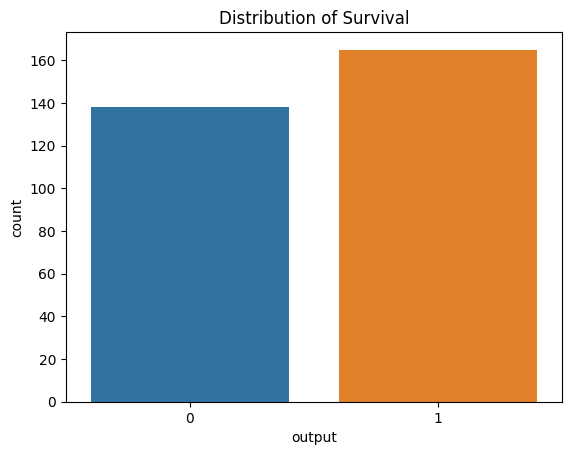

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the target variable
sns.countplot(x='output', data=heart_attack_df)
plt.title('Distribution of Survival')
plt.show()


The plot indicates that slightly more patients in the dataset are at a higher risk of having a heart attack (1) compared to those at a lower risk (0).The distribution appears fairly balanced, which is beneficial for building predictive models.

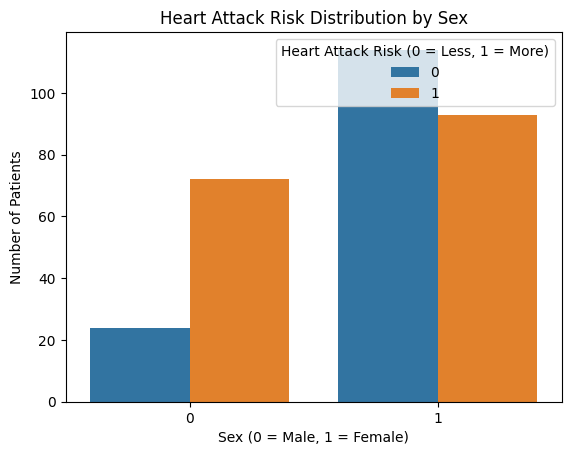

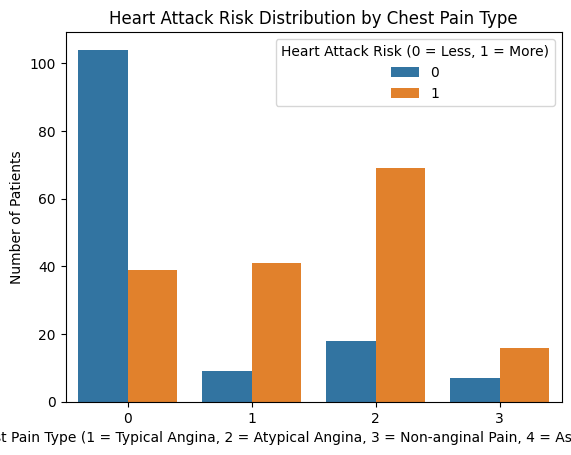

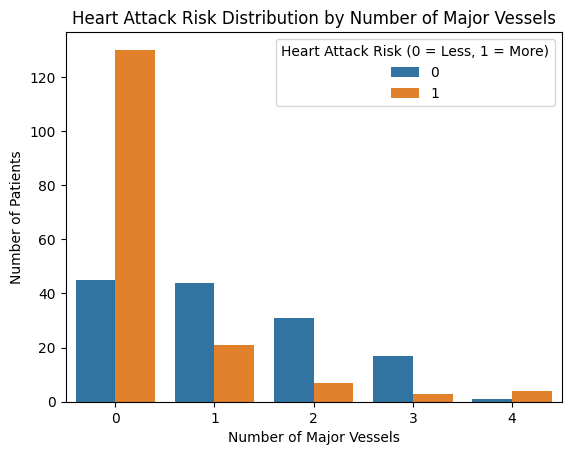

In [11]:
# Heart attack risk distribution by Sex
sns.countplot(x='sex', hue='output', data=heart_attack_df)
plt.title('Heart Attack Risk Distribution by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk (0 = Less, 1 = More)')
plt.show()

# Heart attack risk distribution by Chest Pain Type (cp)
sns.countplot(x='cp', hue='output', data=heart_attack_df)
plt.title('Heart Attack Risk Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk (0 = Less, 1 = More)')
plt.show()

# Heart attack risk distribution by Number of Major Vessels (ca)
sns.countplot(x='caa', hue='output', data=heart_attack_df)
plt.title('Heart Attack Risk Distribution by Number of Major Vessels')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk (0 = Less, 1 = More)')
plt.show()


**Heart Attack Risk Distribution by Sex:** The bar plot shows a notable difference in heart attack risk between males and females. Among males (represented by 0), a higher number of individuals are at a higher risk of heart attac. For females (represented by 1), the numbers are more balanced, with a slightly higher proportion of females at lower risk. This suggests that sex plays a role in heart attack risk, with males more likely to be at higher risk, although the distribution among females is also significant.

**Heart Attack Risk Distribution by Chest Pain Type:** This bar plot reveals that chest pain type is a significant factor in heart attack risk. Patients with typical angina (cp = 1) are mostly at a lower risk of heart attack, while those with atypical angina (cp = 2) and non-anginal pain (cp = 3) have a higher risk. Interestingly, those with asymptomatic chest pain (cp = 4) show a relatively balanced distribution but lean slightly towards a higher risk, indicating that certain types of chest pain are more closely associated with increased heart attack risk.

**Heart Attack Risk Distribution by Number of Major Vessels:** The plot shows that patients with fewer major vessels colored by fluoroscopy (caa = 0) are predominantly at higher risk of heart attack. As the number of major vessels increases (from 1 to 4), the risk of heart attack decreases, with the majority of these patients being at a lower risk. This suggests that the number of major vessels is inversely related to heart attack risk, making it a crucial factor in the analysis.



C:\Users\eduar\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


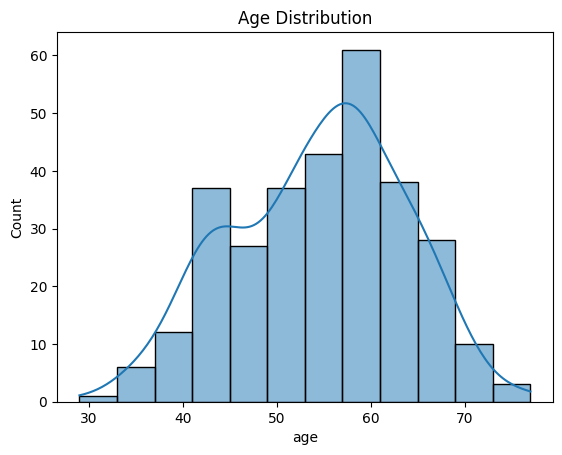

In [12]:
# Distribution of Age
sns.histplot(heart_attack_df['age'], kde=True)
plt.title('Age Distribution')
plt.show()



**Age Distribution** The age distribution appears to be right-skewed, with a peak around the 50-60 age range. This suggests that most of the passengers were adults.


### Correlation matrix

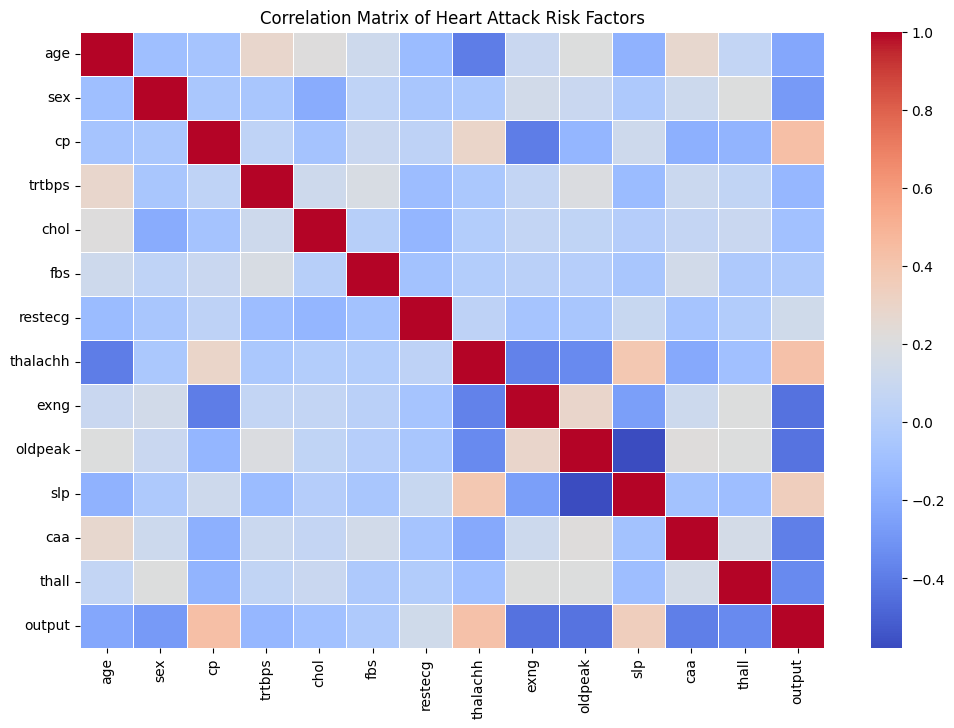

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = heart_attack_df.corr()

# Plot the heatmap without numbers
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, annot=False, cbar=True)
plt.title('Correlation Matrix of Heart Attack Risk Factors')
plt.show()


The correlation matrix reveals that chest pain type (cp), number of major vessels (caa), and thalassemia (thall) are strongly correlated with heart attack risk (output), indicating their importance as predictors. Maximum heart rate (thalachh) has a strong negative correlation with heart attack risk, suggesting lower heart rates are associated with higher risk. Most other features, like age and cholesterol, show weak correlations with the outcome. 

## Data Preprocessing

In [6]:
# Display the data types of each column
print(heart_attack_df.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


There is not need to encoded the categorical variables because there are alrady encoded

In [7]:
from sklearn.model_selection import train_test_split

# Assuming heart_attack_df is your DataFrame and 'output' is the target variable

# Step 1: Separate features and target variable
X = heart_attack_df.drop('output', axis=1)  # Features
y = heart_attack_df['output']  # Target

# Step 2: Split the data into 85% training + validation and 15% test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Step 3: Split the 85% training + validation set into 70% training and 15% validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

# Check the sizes of the splits
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (211, 13)
Validation set size: (46, 13)
Test set size: (46, 13)


I have decided to do 70% for training, 15% of validation (to decide the best model) and 15% for test because we dont have that much data for the training only 211 rows.

In [8]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform the validation and test sets using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data (optional)
print("First 5 rows of scaled training data:\n", X_train_scaled[:5])


First 5 rows of scaled training data:
 [[-0.66929853  0.6672372  -0.93126615 -0.09839703  0.16256494  2.50516707
  -1.02690202  0.0163439   1.37492216 -0.90590632  0.95645839  1.1907891
   1.0638702 ]
 [-0.11936866  0.6672372  -0.93126615  0.46578159 -0.91762743  2.50516707
  -1.02690202  0.23740568  1.37492216  1.70331131 -2.27254513 -0.71990672
   1.0638702 ]
 [ 0.8705051   0.6672372   0.07127037 -0.66257566  0.67208965 -0.39917497
  -1.02690202 -2.0616368  -0.7273139   0.27245003 -0.65804337  0.23544119
   1.0638702 ]
 [ 0.10060328 -1.4987174  -0.93126615  2.7224961   1.60961511 -0.39917497
   2.77443703 -1.44266382  1.37492216  1.95581624 -0.65804337 -0.71990672
  -0.56277192]
 [ 0.8705051  -1.4987174  -0.93126615  0.46578159  2.97514132 -0.39917497
  -1.02690202  0.32583039 -0.7273139   0.10411341 -0.65804337 -0.71990672
  -0.56277192]]


## MODELS

In [21]:
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store the models and their names
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Define the parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }
}

# Dictionary to store accuracy scores for validation set
validation_scores = {}

# Dictionary to store the best models after hyperparameter tuning
best_models = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    y_val_pred = grid_search.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_scores[name] = accuracy
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"{name} Validation Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n", classification_report(y_val, y_val_pred))
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_val, y_val_pred))
    print("\n" + "-"*60 + "\n")



Performing Grid Search for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Validation Accuracy: 0.7826
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.76      0.88      0.81        25

    accuracy                           0.78        46
   macro avg       0.79      0.77      0.78        46
weighted avg       0.79      0.78      0.78        46

Confusion Matrix for Logistic Regression:
 [[14  7]
 [ 3 22]]

------------------------------------------------------------

Performing Grid Search for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Support Vector Machine Validation Accuracy: 0.7826
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.82   

The validation set was crucial in helping us select the best model without overfitting to the test data. We performed hyperparameter tuning for each model, which allowed us to optimize their performance.

**MODEL EVALUATIONS**

**Logistic Regression**  achieved a validation accuracy of 78.26%. It demonstrated a good balance between precision and recall, particularly for the positive class (patients at higher risk of a heart attack), with an F1-score of 0.81. The confusion matrix showed that it correctly identified 22 out of 25 high-risk patients but misclassified 7 out of 21 low-risk patients.

**Support Vector Machine (SVM)**  also achieved a validation accuracy of 78.26%. The SVM performed comparably to Logistic Regression, with balanced precision and recall for both classes, and an F1-score of 0.81 for high-risk patients. However, it slightly underperformed in identifying low-risk patients.

**Random Forest** matched the performance of Logistic Regression and SVM with a validation accuracy of 78.26%. However, it demonstrated a more balanced performance across precision and recall, with an F1-score of 0.81 for high-risk patients and a better recall for low-risk patients, correctly classifying 15 out of 21 low-risk patients. This balance suggests that Random Forest is slightly more robust in handling different patient classes.

**K-Nearest Neighbors (k-NN)** achieved the same validation accuracy of 78.26%, showing similar performance to the other models. Its F1-score was 0.81 for high-risk patients, but like Logistic Regression and SVM, it struggled more with low-risk patients, misclassifying 7 out of 21.

**Gradient Boosting** underperformed relative to the other models with a validation accuracy of 73.91%. It showed balanced results but did not reach the performance levels of Logistic Regression, SVM, Random Forest, or k-NN. The F1-score for high-risk patients was 0.78, indicating that it was slightly less effective than the other models.

In [22]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming the Random Forest model was trained and stored in best_models earlier
best_model = best_models["Random Forest"]

# Evaluate the Random Forest model on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy of the Random Forest model: {test_accuracy:.4f}")
print(f"Classification Report for the Random Forest model on Test Set:\n", classification_report(y_test, y_test_pred))
print(f"Confusion Matrix for the Random Forest model on Test Set:\n", confusion_matrix(y_test, y_test_pred))



Best model (Random Forest) saved as 'best_model.pkl'

Test Accuracy of the Random Forest model: 0.8043
Classification Report for the Random Forest model on Test Set:
               precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.75      0.96      0.84        25

    accuracy                           0.80        46
   macro avg       0.84      0.79      0.79        46
weighted avg       0.83      0.80      0.80        46

Confusion Matrix for the Random Forest model on Test Set:
 [[13  8]
 [ 1 24]]


**Final Model Selection and Test Evaluation:**

After evaluating the models, we selected Random Forest as the best model based on its balanced performance, despite the identical validation accuracy compared to Logistic Regression, SVM, and k-NN. The Random Forest model’s ability to better classify low-risk patients without compromising the performance on high-risk patients made it the most reliable choice for deployment.

We then evaluated the Random Forest model on the test set to get an unbiased estimate of its performance on unseen data. The Random Forest model achieved a test accuracy of 80.43%. The test results indicated that the model maintained a strong balance, with an F1-score of 0.84 for high-risk patients and 0.74 for low-risk patients. The confusion matrix showed that the model correctly identified 24 out of 25 high-risk patients and 13 out of 21 low-risk patients.